# Bayesian Belief Network

Bayesian Belief Network is a graphical representation of different probabilistic relationships among random variables in a particular set. It is a classifier with no dependency on attributes i.e it is condition independent. Due to its feature of joint probability, the probability in Bayesian Belief Network is derived, based on a condition — P(attribute/parent) i.e probability of an attribute, true over parent attribute.

![Example](https://media.geeksforgeeks.org/wp-content/uploads/20200816124850/BBN.png)

-  In the above figure, we have an alarm ‘A’ – a node, say installed in a house of a person ‘gfg’, which rings upon two probabilities i.e burglary ‘B’ and fire ‘F’, which are – parent nodes of the alarm node. The alarm is the parent node of two probabilities P1 calls  ‘P1’ & P2 calls ‘P2’ person nodes.
-  Upon the instance of burglary and fire, ‘P1’ and ‘P2’ call person ‘gfg’, respectively. But, there are few drawbacks in this case, as sometimes ‘P1’ may forget to call the person ‘gfg’, even after hearing the alarm, as he has a tendency to forget things, quick.  Similarly, ‘P2’, sometimes fails to call the person ‘gfg’, as he is only able to hear the alarm, from a certain distance.

Source: [basic-understanding-of-bayesian-belief-networks](https://www.geeksforgeeks.org/basic-understanding-of-bayesian-belief-networks/)

In [39]:
from pgmpy.models import BayesianNetwork

# Create a Bayesian Network Model
model = BayesianNetwork([('Fever', 'Flu'), ('Cough', 'Flu'), ('Flu', 'Cold')])

In [40]:
from pgmpy.factors.discrete import TabularCPD
"""
CPT stands for Conditional Probability Table. 
In the context of Bayesian Belief Networks (BBNs) or Bayesian Networks, 
CPTs play a crucial role in modeling the probabilistic relationships between random variables. 
They are used to define the conditional probabilities of a node's values given the values of its parent nodes. 
In pgmpy, CPTs are represented using the TabularCPD class.
"""
# Fever CPT
cpt_fever = TabularCPD(variable='Fever', variable_card=2, values=[[0.95], [0.05]])
model.add_cpds(cpt_fever)

# Cough CPT
cpt_cough = TabularCPD(variable='Cough', variable_card=2, values=[[0.85], [0.15]])
model.add_cpds(cpt_cough)

# Flu CPT
cpt_flu = TabularCPD(variable='Flu', variable_card=2, values=[[0.99, 0.40, 0.20, 0.01],
                                                              [0.01, 0.60, 0.80, 0.99]],
                     evidence=['Fever', 'Cough'], evidence_card=[2, 2])
model.add_cpds(cpt_flu)

# Cold CPT
cpt_cold = TabularCPD(variable='Cold', variable_card=2, values=[[0.90, 0.40], 
                                                                [0.10, 0.60]],
                      evidence=['Flu'], evidence_card=[2])
model.add_cpds(cpt_cold)



In [41]:
from pgmpy.inference import VariableElimination
"""
Inference in a BBN refers to the process of using the network to make 
probabilistic predictions or to answer queries about specific random variables based on available evidence.
Inference helps us compute the posterior probabilities of variables of interest given observations or evidence. 
It's a central component of BBNs and allows us to reason under uncertainty.
In pgmpy, the VariableElimination class is used to perform inference in a BBN.
"""

# Create an inference object
inference = VariableElimination(model)

# Query the network for probabilities
result = inference.query(variables=['Flu', 'Cold'], 
                         evidence={'Fever': 1, 'Cough': 0})
print(result)


+--------+---------+-----------------+
| Flu    | Cold    |   phi(Flu,Cold) |
+========+=========+=================+
| Flu(0) | Cold(0) |          0.1800 |
+--------+---------+-----------------+
| Flu(0) | Cold(1) |          0.0200 |
+--------+---------+-----------------+
| Flu(1) | Cold(0) |          0.3200 |
+--------+---------+-----------------+
| Flu(1) | Cold(1) |          0.4800 |
+--------+---------+-----------------+


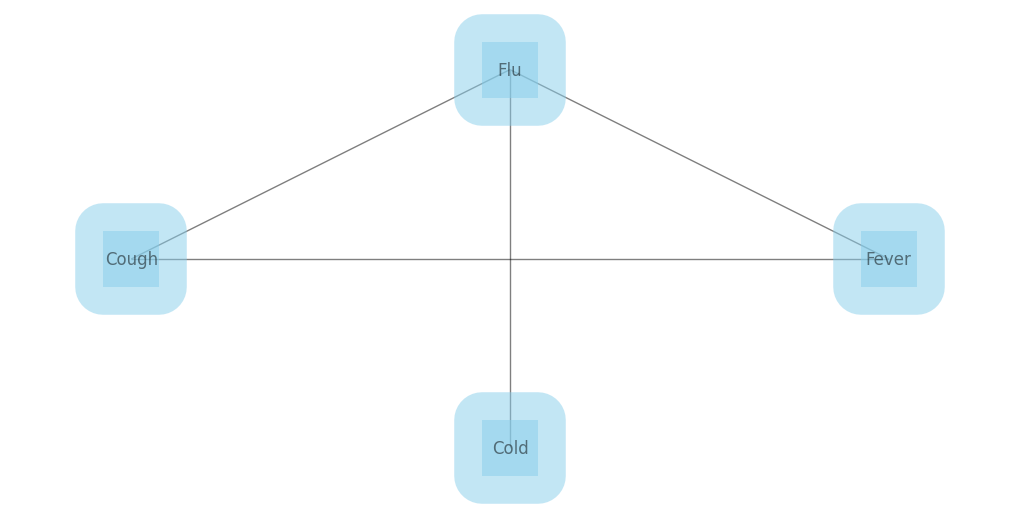

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the model to a networkx graph for visualization
nx_graph = model.to_markov_model()

# Visualize the network
plt.figure(figsize=(10, 5))

pos = nx.kamada_kawai_layout(nx_graph)

nx.draw(nx_graph, pos, with_labels=True, node_size=1600, node_color="skyblue", 
        node_shape="s", alpha=0.5, linewidths=40)

plt.margins(0.1)
plt.show()
